
# 🛍️ Customer Segmentation using K-Means Clustering

This project uses **Unsupervised Learning** to perform **Customer Segmentation** based on their income and spending score.

---

## 📌 Objective
To group mall customers into distinct segments to help businesses target marketing strategies effectively.

---

## 🛠️ Libraries Used
- Pandas
- NumPy
- Matplotlib
- Seaborn
- Scikit-learn

---

## 📁 Dataset
- `CustomerID`
- `Gender`
- `Age`
- `Annual Income (k$)`
- `Spending Score (1–100)`

---

## 🔍 Steps Performed

### 1. Load and Explore Data


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
import pandas as pd

df = pd.read_csv("mall_customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Female,21,16,81
2,3,Female,20,17,6
3,4,Male,23,18,77
4,5,Female,31,19,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              10 non-null     int64 
 1   Gender                  10 non-null     object
 2   Age                     10 non-null     int64 
 3   Annual Income (k$)      10 non-null     int64 
 4   Spending Score (1-100)  10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes


In [7]:
# Selecting features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

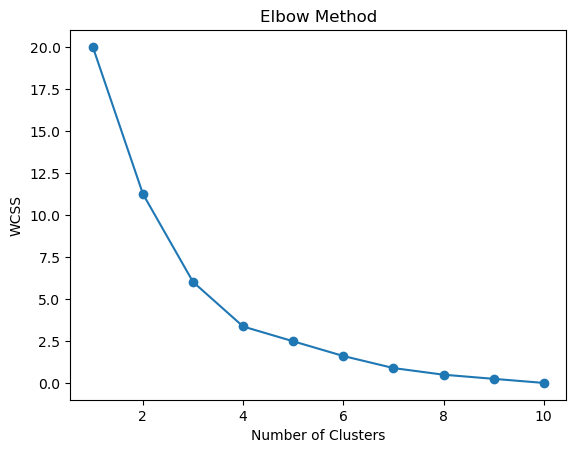

In [8]:
# Elbow Method to find optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


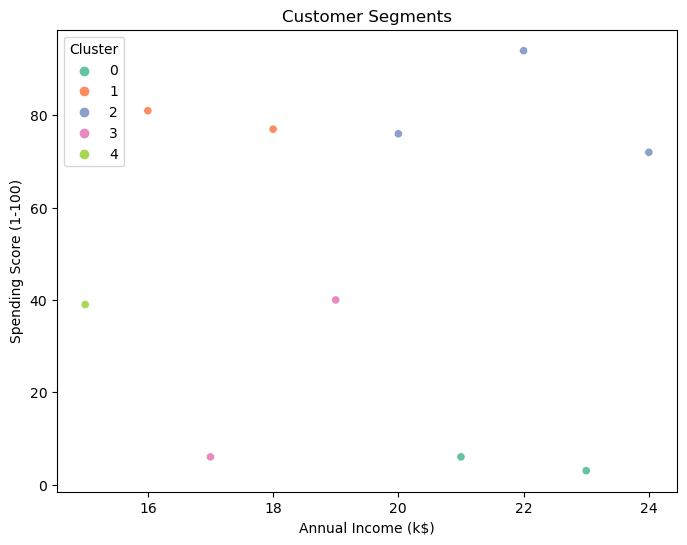

In [10]:
# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set2')
plt.title('Customer Segments')
plt.show()